# Introduction to Data Science Long Assignment 2024/25
## Prediction Health Insurance
-----
#### Group L:
- Carolina Pires, 202408704
- Diogo Teixeira, 201705082
- Mariia Zhokhova, 202408799

## 1. Business Understanding

### 1.1 Business Objectives 
#### Background
The healthcare system in the United States differs significantly from the public universal healthcare systems in many European countries. In the U.S., access to health insurance is often tied to employment, income, and other socioeconomic factors. However, health insurance coverage is not universal, and many citizens may not have access to or choose not to acquire coverage. This project aims to predict the likelihood of a customer not having health insurance based on demographic and behavioral characteristics.

#### Business Objective
The main goal of this project is to create a machine-learning model to predict which customers do not have health insurance. This will allow the company to identify customers more likely to be uninsured and target them with appropriate marketing or sales strategies.

#### Business Success Criteria
The success of the project will be measured by:
- Accuracy: The model should correctly predict whether customers have health insurance or not, with an accuracy above 80%; ???????????????????????
- Financial impact: The implementation of the model should lead to an increase in health insurance sales or enrollments;
- Efficiency: The model should be efficient regarding human, time and computational resources.


## 1.2 Situation
### Inventory of Resources
Resources available for this project include:
- Dataset: Contains information on customers whose health insurance status we know, including variables that might help predict the probability of insurance coverage such as age, employment status, income, information about residence
and vehicles, and more;
- Analysis and Modeling Tools: Python, libraries such as pandas, numpy, matplotlib, seaborn for data analysis, and scikit-learn for predictive modeling;
- Data Science Team: Three (future) data scientists will assist in data interpretation and modeling decisions.

### Requirements, Assumptions, and Constraints
Requirements:
- A predictive model capable of effectively classifying customers;
- The model should be built transparently so stakeholders can understand the logic behind the predictions.

Assumptions:
- The dataset is representative of the target customer population;
- The provided variables (age, employment status, income, etc.) are useful predictors for the presence of health insurance;
- Machine learning algorithms can effectively model the relationship between the variables and the target variable (health_ins).

Constraints:
- Missing data: The dataset have missing values that need to be handled; 
- Class imbalance: The target variable (health_ins) have an imbalance between classes (many customers with insurance and fewer without), which could affect the model's performance.

### Risks and Contingencies
Risks:
- Dirty data: The data may contain errors or inconsistencies, which could affect model quality;
- Non-representative data: The model may only generalize well if the dataset represents the real-world market.

Contingencies:
- If the data is inconsistent, a more thorough data cleaning process will be implemented;
- If the model performance is low, data preprocessing will be revisited with different algorithms and balancing techniques.

### Terminology
- Health Insurance: Refers to the target variable (health_ins), which indicates whether a customer has health insurance;
- Features: The predictor variables such as age, income, is_employed, marital_status, among others, used to predict the health_ins variable;
- Predictive Model: The machine learning model used to predict whether a customer has health insurance or not.

### Costs and Benefits
Costs:
- Implementation cost: The time required to develop the model, including exploratory data analysis, model building, and validation;
- Computational costs: The computing time required to train and evaluate models.

Benefits: 
- Improved customer segmentation: The company can more effectively identify customers without health insurance for targeted campaigns.
- Increased sales: Better segmentation can increase health insurance enrollments, providing financial benefits.
- Increased customer satisfaction: Personalized offers based on predictions can increase customer satisfaction and brand loyalty.


## 1.3 Data Mining Goals
### Data Mining Goals
Through data mining we aim to build a predictive model that, given a set of customer features (age, employment status, income, etc.), predicts the likelihood of a customer not having health insurance.

### Data Mining Success Criteria ??????
- Accuracy above 80%: The model should accurately predict whether customers have health insurance or not;
- Robust and generalizable model: The model should generalize well to new data without overfitting;
- Model interpretability: The model should be interpretable to stakeholders, providing insights into the most most critical health insurance coverage variables.

## 2. Data Understanding

### 2.1 Initial Data Collection Report
The dataset used for this analysis, which contains information about U.S. customers and their health insurance status, was collected from customers whose health insurance status we know. 
The dataset consists of 724568 observations and 15 variables.

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Read the data
data = pd.read_csv('customer.csv')

In [3]:
# Number of rows and columns of the dataset
print("number of rows:",data.shape[0])
print("number of columns:",data.shape[1])

number of rows: 72458
number of columns: 15


### 2.2 Data Description Report
As stated before, this dataset contains 15 variables:
- custid: Unique identifier for each customer; will not be used in modeling but serves as a reference for customer data;
- sex: Represents the gender of the customer (Female, Male);
- is_employed: Indicates whether the customer is employed, not employed or not in the workforce;
- income: Represents the customer’s income. Can be negative, due to losses;
- Describes the marital status of the customer (Divorced/Separated, Married, Never Married or Widowed);
- health_ins: The target variable, indicating whether the customer has health insurance;
- housing_type: The housing status of the customer (Homeowner free and clear, Homeowner with mortgage/loan, Occupied with no rent or Rented);
- num_vehicles: The number of vehicles in the customer household (0, 1, 2, 3, 4, 5, or 6 or more);
- age: The customer’s age;
- state_of_res: The U.S. state in which the customer resides (includes the District of Columbia);
- gas_usage: Indicates the monthly gas bill category (001 - Included in rent or in condo fee; 002 - Included in electricity payment; 003 - No charge or gas not used; 004..999 - $4 to $999 - rounded and top-coded);
- rooms: Number of rooms in the customer's house;
- recent_move_b: Whether the customer has moved in the past year.

Also the dataset has two variables "Unnamed:0" and "code_column" that are not taked in account in this analys.s.

In [4]:
# Variables of the dataset
data.columns

Index(['Unnamed: 0', 'custid', 'sex', 'is_employed', 'income',
       'marital_status', 'health_ins', 'housing_type', 'num_vehicles', 'age',
       'state_of_res', 'code_column', 'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')

In [5]:
# Information about the dataset
print("Information about the dataset:\n")
data.info()

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


### 2.3 Data Exploration Report
We start by analyzing the first lines of the dataset and the descriptive statistics.

In [6]:
# First lines of the dataset
print("First lines of the dataset:\n")
data.head()

First lines of the dataset:



,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [7]:
# Descritive statistics 
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


Now, taking into account the information about the data, we replace the 0 values in the variable age as NaN values, since they mean that the age is unknown. After that we check how many variables have missing values.

In [8]:
# Replace 0 for NaN in the age variable
data['age'] = data['age'].replace(0, np.nan)

In [9]:
# Number of variables with missing values
print(f'There are {data.isnull().any().sum()} variables in train dataset with missing values.')

There are 6 variables in train dataset with missing values.


In [10]:
# Number of missing values by variable
print("Missing Values for variable:")
data.isnull().sum()

Missing Values for variable:


Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                  77
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

Next, we assess the balance of the target classes. The figure below reveals that 90.5% of customers have health insurance, whereas only 9.5% do not. This indicates a highly imbalanced target variable.

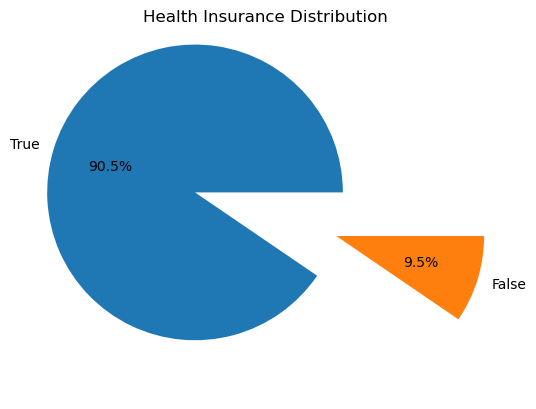

In [11]:
# Checking the class balance
data['health_ins'].value_counts().plot.pie(explode=[0.5, 0.5],autopct='%1.1f%%')
plt.ylabel('')  
plt.title('Health Insurance Distribution')  
plt.show()

After this first data exploration, we try to answer some important questions, regarding the profiles of the customers.

- Are they young, middle-aged, or seniors?

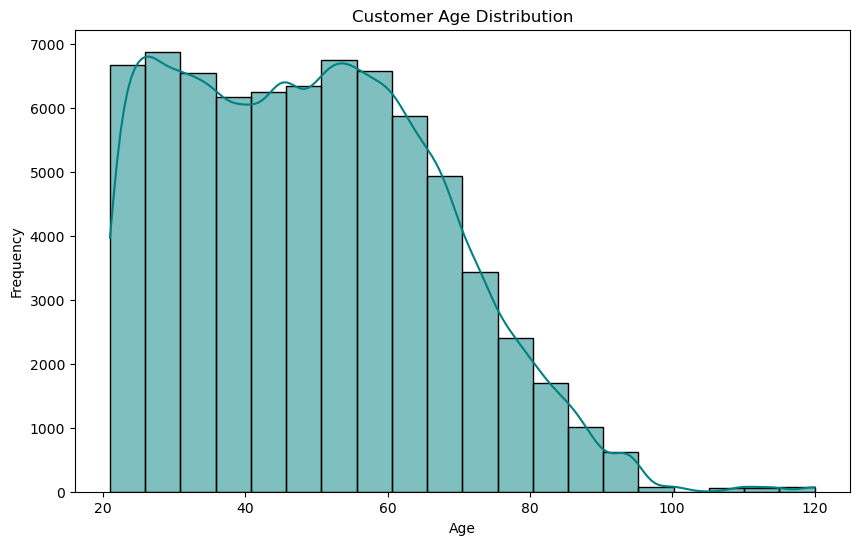

In [12]:
# Histogram with the Customer Age Distrbution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, color= 'teal', kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution is predominantly concentrated below 60, with two peaks in the 20s and 50s. Beyond 60, the distribution declines, though a few outliers extend up to 120 years.

Now we divide the customers in three categories: "Young" - if with less than 30 years; "Middle-aged" - if with 30 or more years and less than 60 years; "Senior" - if with 60 or more years, and make a plot to see the distrbution.

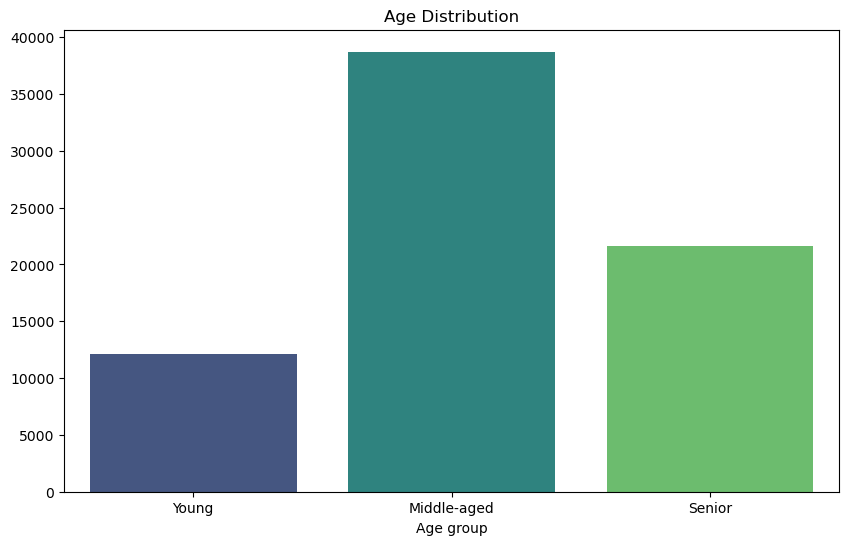

In [13]:
# Dividing the customers in 3 categories by age and plot the distribution
def age_distribuition(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

data['age_group'] = data['age'].apply(age_distribuition)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=data, palette='viridis', 
    order=['Young', 'Middle-aged', 'Senior'])
plt.title('Age Distribution')
plt.xlabel('Age group')
plt.ylabel('')
plt.show()

The customers are mostly middle-aged.

- How affluent are they?

For answer this question, we start by doing a scatterplot for the income distribution.

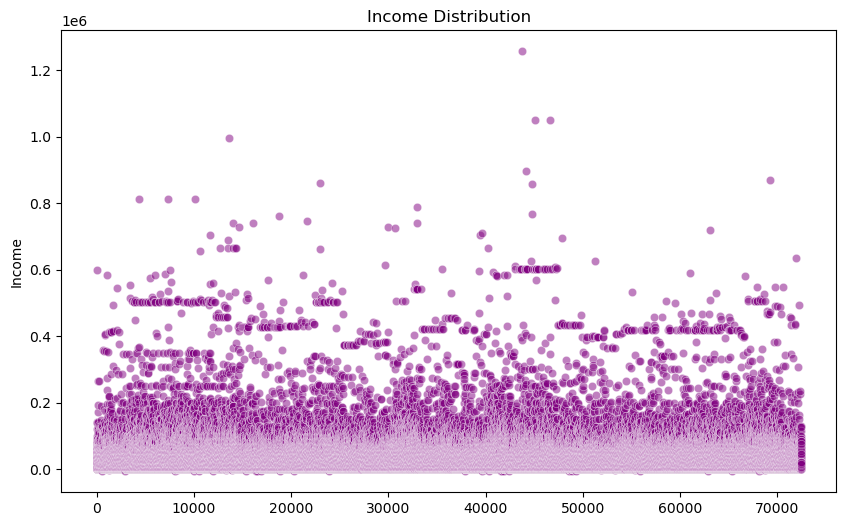

In [14]:
# Scatterplot for the income distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['income'], alpha=0.5, color='purple')
plt.title('Income Distribution')
plt.xlabel('')
plt.ylabel('Income')
plt.show()

We can see from the plot that the income distrbution is more concentrated in the lower values. To validate this, we do a plot to analyze the density by income value.

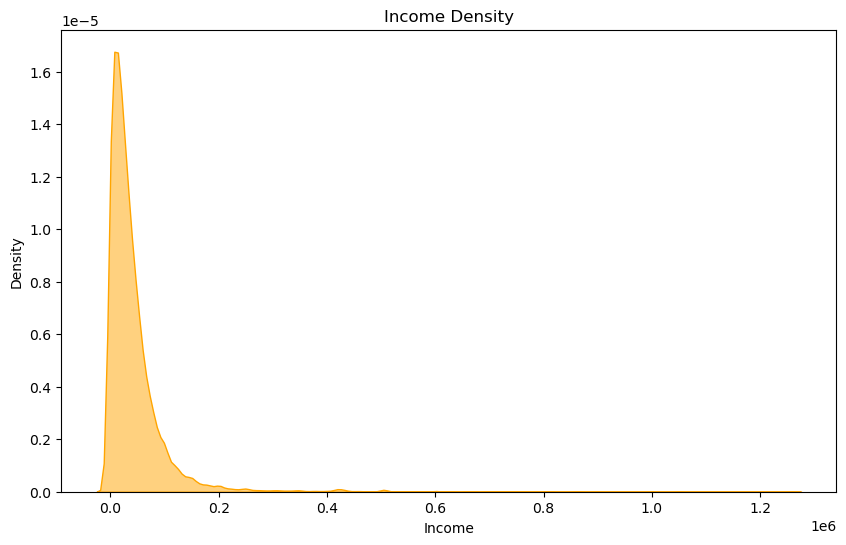

In [15]:
# Plot for the income density
plt.figure(figsize=(10, 6))
sns.kdeplot(data['income'], fill=True, color='orange', alpha=0.5)
plt.title('Income Density')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

Now, we clearly see that the income values are more concentrated in the lower values and we also see that there are negative values with some relevant density. To finalize by describing the data to look to the numbers.

In [16]:
# Describe the income variable
data[['income']].describe()


,income
count,7.245800e+04
mean,4.188143e+04
std,5.827460e+04
min,-6.900000e+03
25%,1.070000e+04
50%,2.640000e+04
75%,5.200000e+04
max,1.257000e+06


From this we noticed that there are some "big" (outliers, maybe) income values and confirm the negative ones from the minimum.

- Where do they live?

To answer this question we make a barplot, regarding the state of residence of the customers.

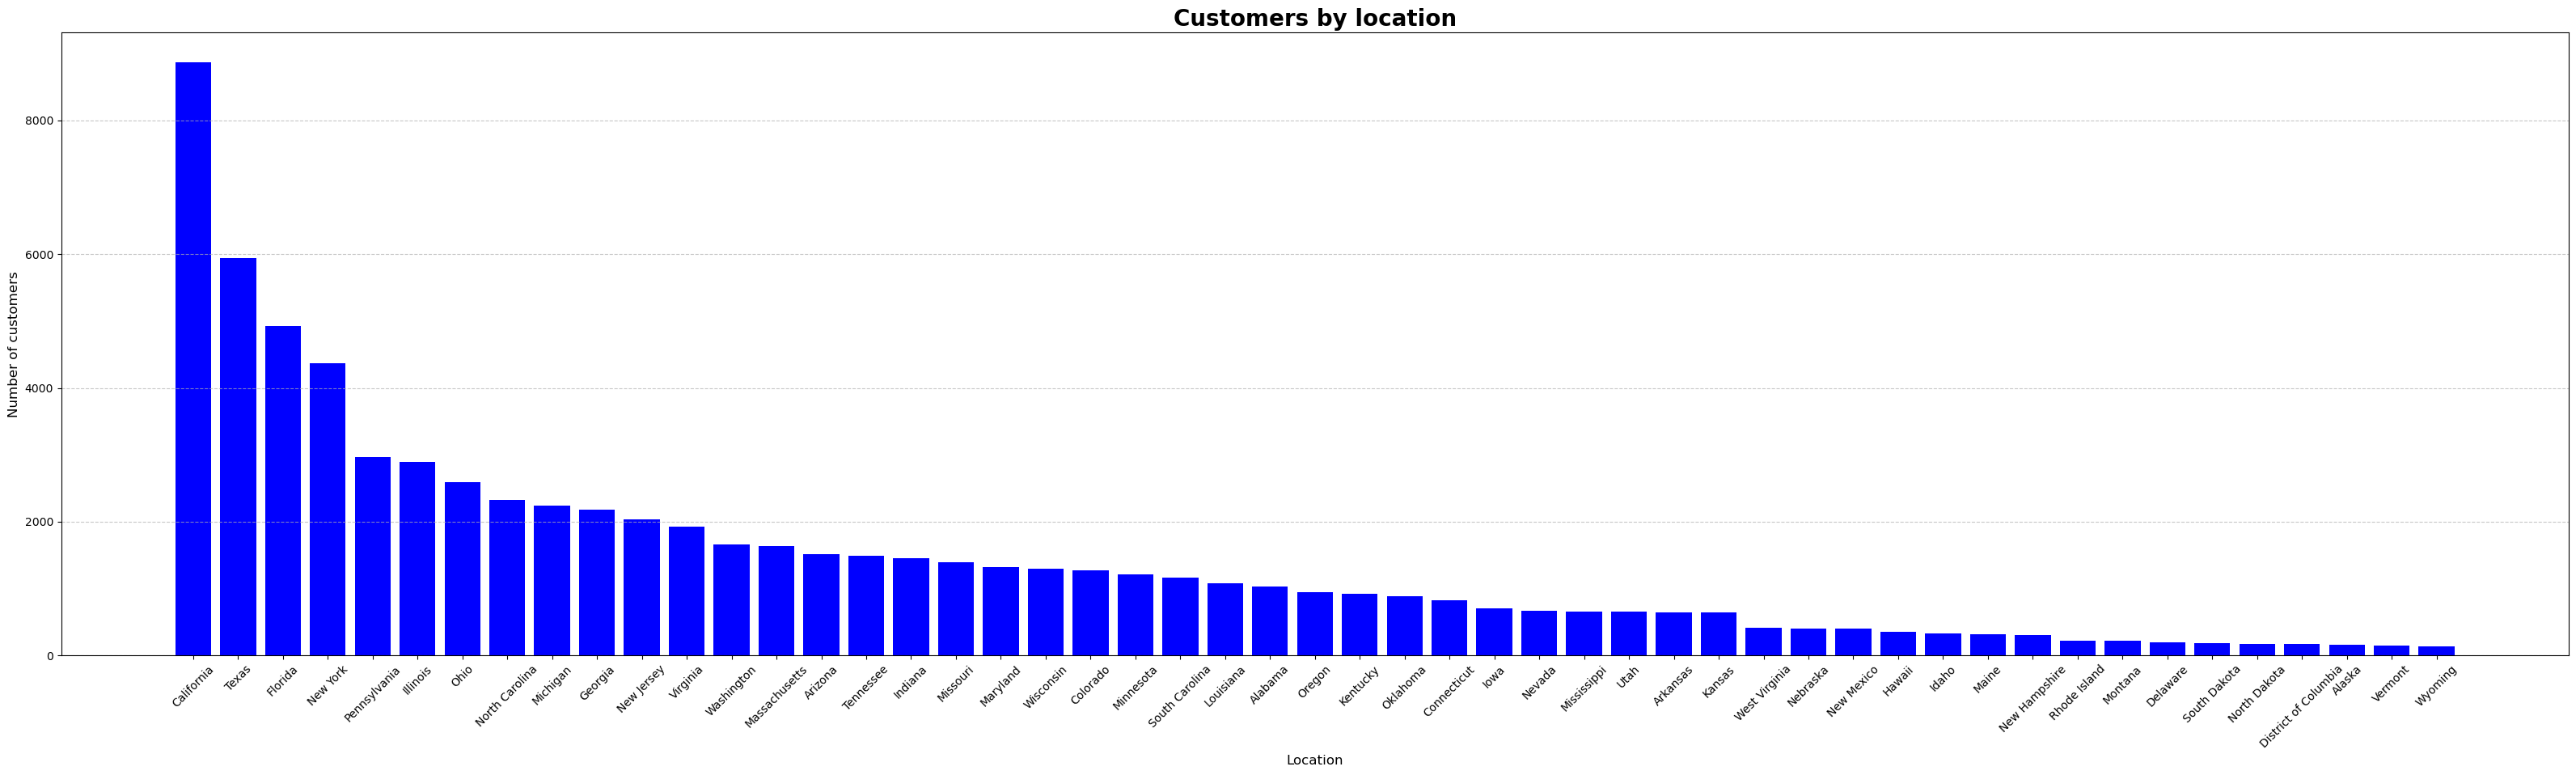

In [17]:
# Barplot of the customers state of residence
location_counts = data.groupby('state_of_res', as_index=False).count().sort_values(by='custid', ascending=False)

plt.figure(figsize=(40, 10))
plt.bar(location_counts['state_of_res'], location_counts['custid'], color='blue')
plt.title('Customers by location', fontsize=20, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

From the plot we conclude that are some states with more customers, namely California, Texas, Florida and New York, all with more than 4000 customers. However, the number of locals of residence (51), maybe make this variable not very significant for this analysis.

- Did you see differences in the income related to age, gender or the marital situation?

Taking into account the groups previous created to age, we do a barplot to analyze differences on income per group.

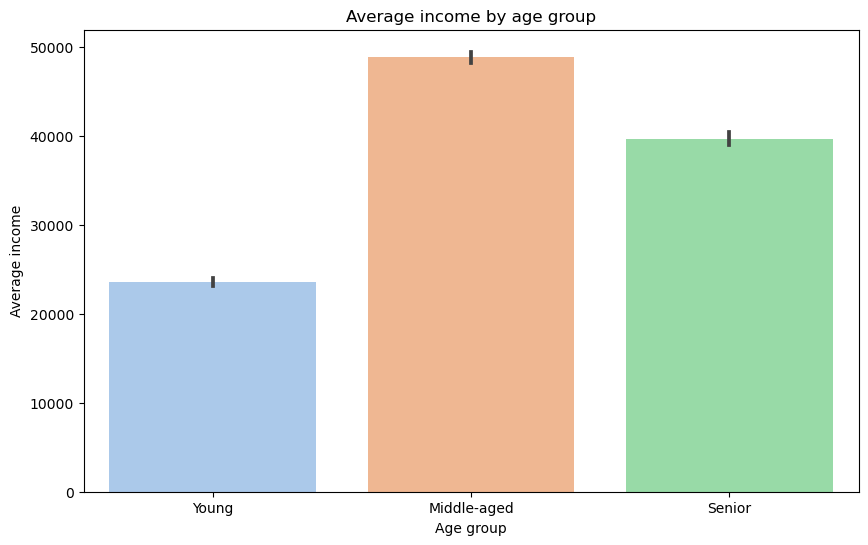

In [18]:
# Average income by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='income', data=data, palette='pastel', 
    order=['Young', 'Middle-aged', 'Senior'])
plt.title('Average income by age group')
plt.xlabel('Age group')
plt.ylabel('Average income')
plt.show()

The middle-aged group is (as relatively expected, because it is the age group that, probably, is going through the best years of their career) the one with more average income, followed by the senior and, lastly, the young.

To the gender-income analysis we did a stripplot.

C:\Users\diogo\AppData\Local\Temp\ipykernel_22288\77083273.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='sex', y='income', data=data, jitter=True, alpha=0.6, palette='muted')


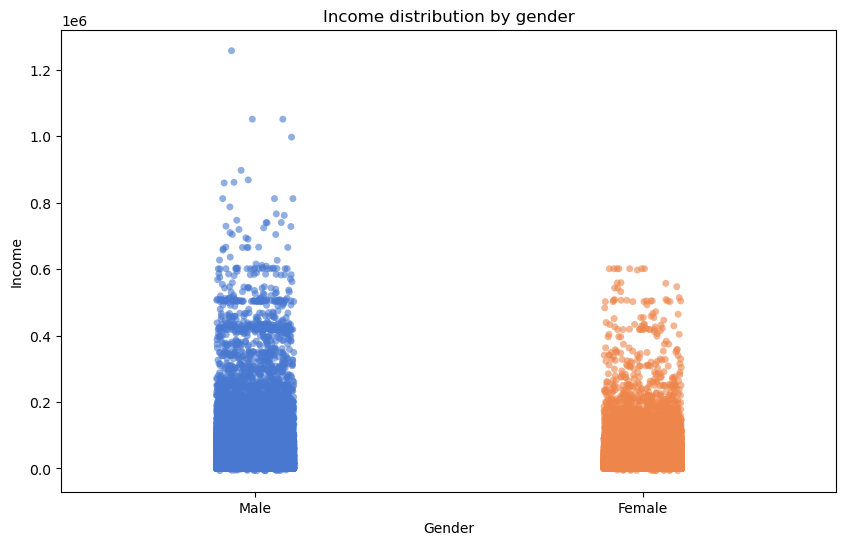

In [19]:
# Income distribution by gender
plt.figure(figsize=(10, 6))
sns.stripplot(x='sex', y='income', data=data, jitter=True, alpha=0.6, palette='muted')
plt.title('Income distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

The male gender has a more "stretched" income for the highest values, also presenting some significant outliers.

Again, a barplot, this time to analyze the average income by martial status.

C:\Users\diogo\AppData\Local\Temp\ipykernel_22288\2379992847.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='marital_status', y='income', data=data, ci=None, palette='Set1')


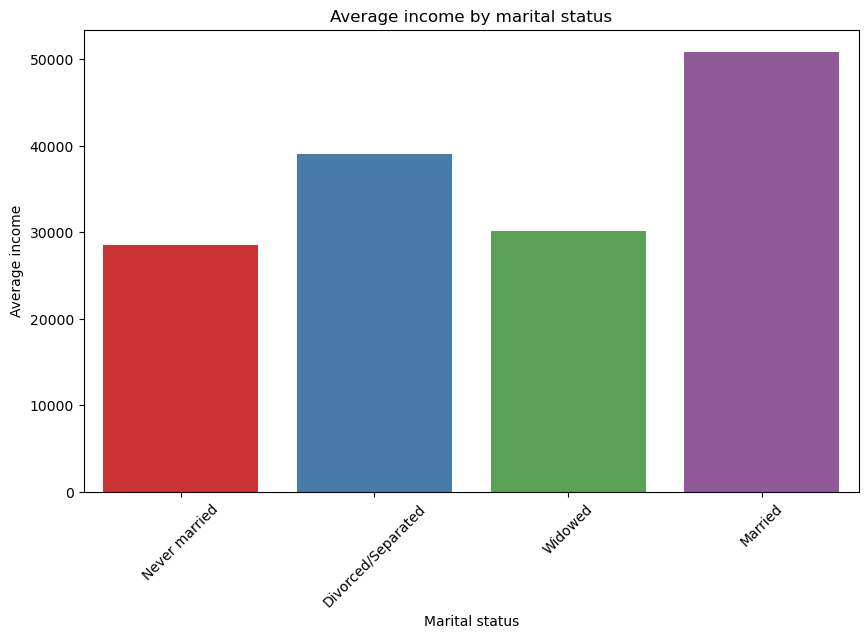

In [20]:
# Average income by martial status
plt.figure(figsize=(10, 6))
sns.barplot(x='marital_status', y='income', data=data, ci=None, palette='Set1')
plt.title('Average income by marital status')
plt.xlabel('Marital status')
plt.ylabel('Average income')
plt.xticks(rotation=45)
plt.show()

The married customers are the ones with higher income, followed by the "divorce/separated" group. The lower average income is for the "never married" group.

- Are the characteristics of the housing situation interrelated?


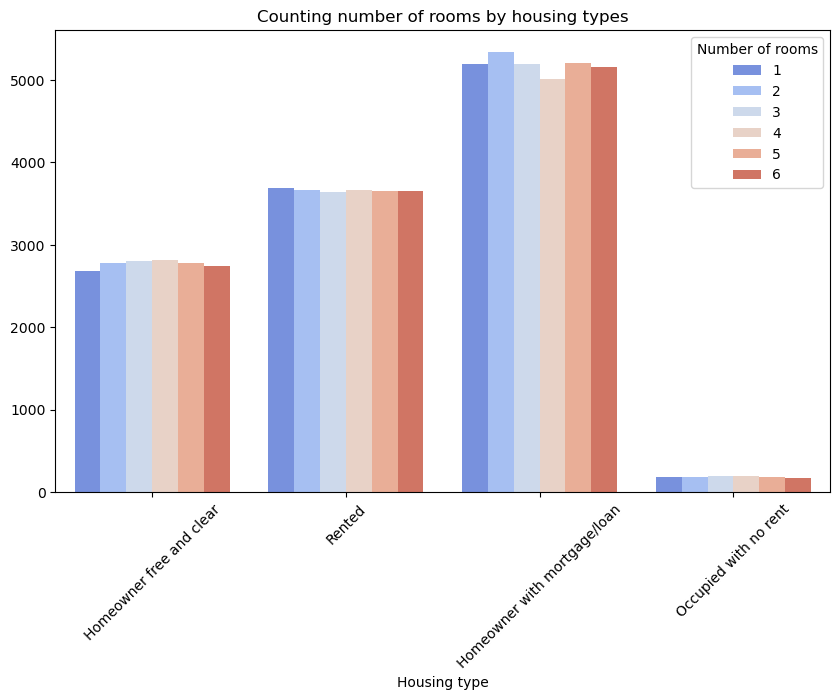

In [21]:
# Number of rooms by housing types
plt.figure(figsize=(10, 6))
sns.countplot(x='housing_type', hue='rooms', data=data, palette='coolwarm')
plt.title('Counting number of rooms by housing types')
plt.xlabel('Housing type')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Number of rooms')
plt.show()


Starting by the possible relationship between the housing type and the number of rooms, we were able to perceive an absence of a clear pattern. Of note, only a slightly higher concentration of the number of rooms between 3 and 4, in homeowner free and clear, 1 room in rented and 2 rooms in homeowner with mortgage/loan.

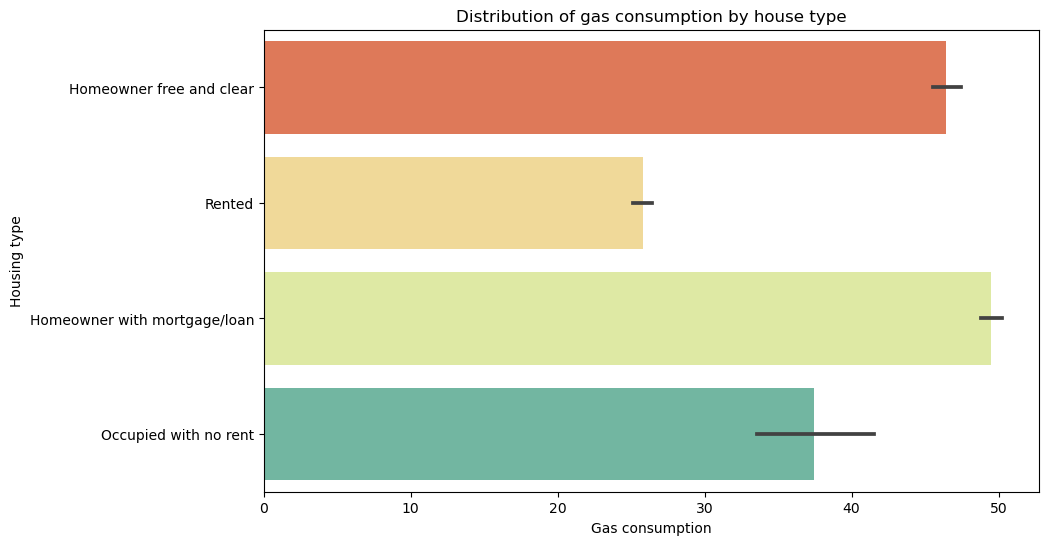

In [22]:
# Distribution of gas consumption by house type
plt.figure(figsize=(10, 6))
sns.barplot(x='gas_usage', y='housing_type', data=data, palette='Spectral')
plt.title('Distribution of gas consumption by house type')
plt.xlabel('Gas consumption')
plt.ylabel('Housing type')
plt.show()

Regarding the relationship between the house type and the gas consumption we can see some significant differences. The homeowners with mortgage/loan are those with the highest gas consumption with an average of almost 50 dollars in the monthly gas bill amount. The free and clear homeowners also spend more than $45 per month, while those occupied with no rent spend less than $40. Finally, those who rented have a substantially lower expense (around $25), but this may (or may not) be related to the fact that they have gas expenses Included in rent

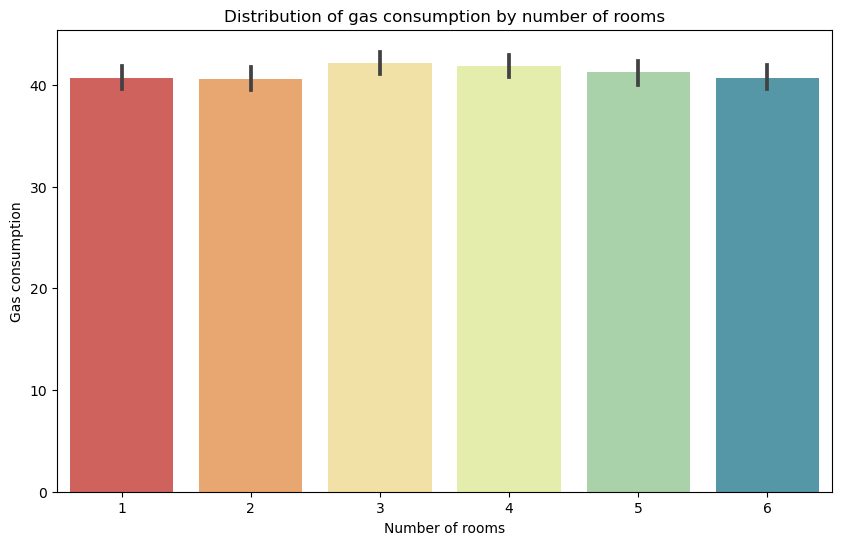

In [23]:
# Distribution of gas consumption by number of rooms
plt.figure(figsize=(10, 6))
sns.barplot(x='rooms', y='gas_usage', data=data, palette='Spectral')
plt.title('Distribution of gas consumption by number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Gas consumption')
plt.show()

In the last plot, we can not see very significant differences in the gas consumption-number of rooms relationship. Although we can see that the customers with 3 or 4 rooms have slightly bigger gas consumption.

c:\Users\diogo\anaconda3_\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


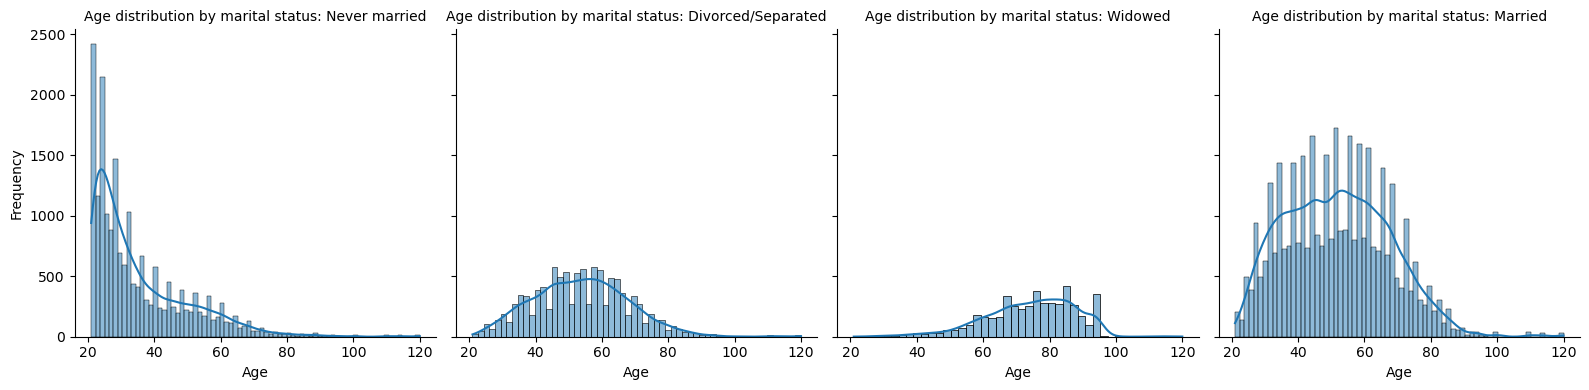

In [24]:
g = sns.FacetGrid(data, col='marital_status', height=4, aspect=1)
g.map(sns.histplot, 'age', kde=True)
g.set_axis_labels("Age", "Frequency")
g.set_titles("Age distribution by marital status: {col_name}")
plt.show()

As expected, the never married are concentrated in those of younger age, the widowed, although significantly less, are more concentrated in older ages. The divorced/separated follow a similar distribution to the married (with greater observations in the center and fewer observations at the extremes) but with significantly fewer observations.

Now we will check the possibility of relationships between variables. We start by see the possiblity of relationship between age and income.

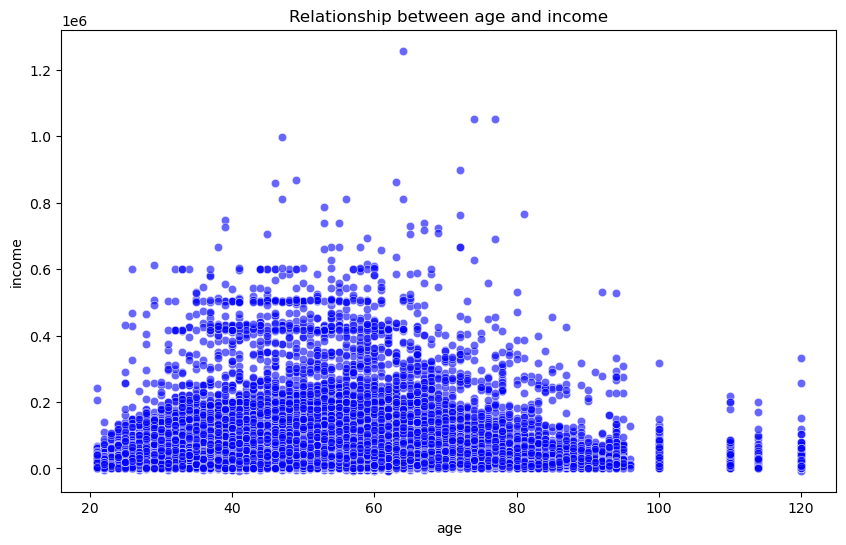

In [25]:
# Relation between age and income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=data, alpha=0.6, color='blue')
plt.title('Relationship between age and income')
plt.xlabel('age')
plt.ylabel('income')
plt.show()

We can see, through the scatter plot, greater income in the middle-aged people (as we already saw above) and some relevant otuliers with more than 100 years.

Now we analyze the probability of health insurance by age.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


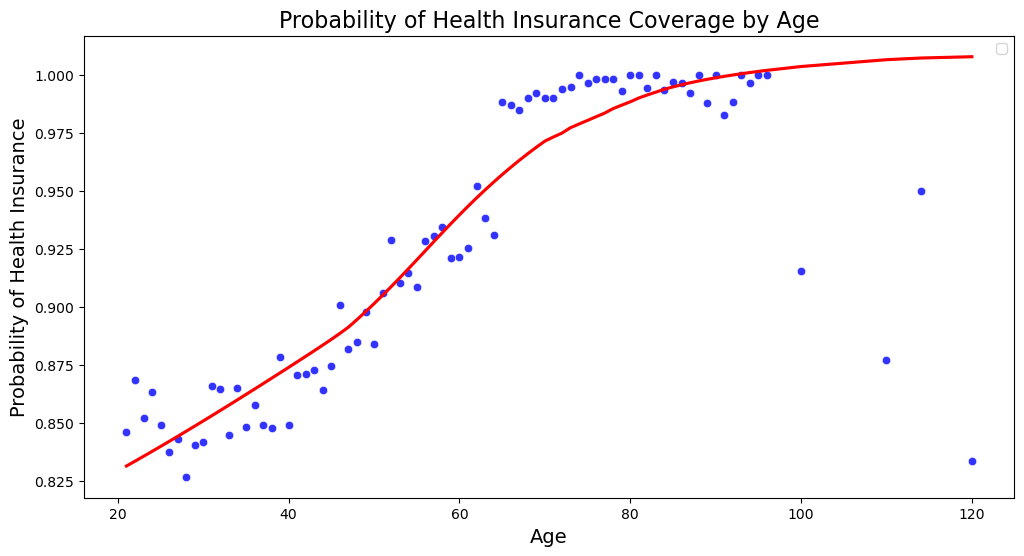

In [26]:
# Probability of health insurance by age
# Calculate the probability of health insurance by age
age_health_prob = data.groupby('age')['health_ins'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='health_ins', data=age_health_prob, color='blue', alpha=0.8)
# Add a trend line to show the general pattern
sns.regplot(x='age', y='health_ins', data=age_health_prob, scatter=False, color='red', 
            lowess=True, line_kws={'label': "Trend line"})
plt.title('Probability of Health Insurance Coverage by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Probability of Health Insurance', fontsize=14)
plt.legend()
plt.show()

We see a clear pattern. The probability of having health insurance increase with age (despite the outliers values, that are probably wrong observations).

We move forward and this time we try to visualize the martial status according to the housing type.

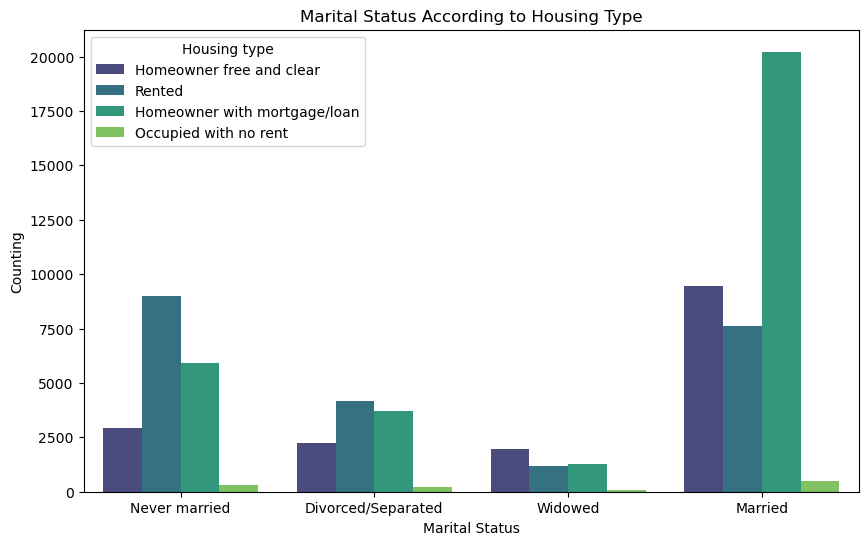

In [27]:
# Martial status according to the housing type
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='housing_type', data=data, palette='viridis')
plt.title('Marital Status According to Housing Type')
plt.xlabel('Marital Status')
plt.ylabel('Counting')
plt.legend(title='Housing type')
plt.show()

Almost all housing types are more represented among married people, with the exception of rented houses, which are more represented among never married people.

This time we seek to understand the distribution of health insurance by martial status.

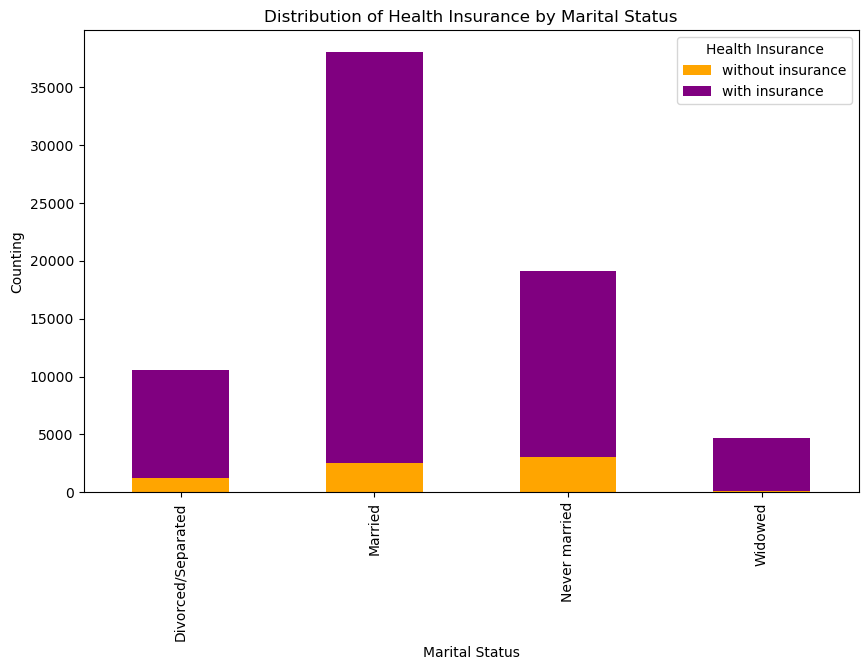

In [28]:
# Health insurance distrbution by martial status
marital_health_counts = data.groupby(['marital_status', 'health_ins']).size().unstack()

marital_health_counts.plot(kind='bar', stacked=True, color=['orange', 'purple'], figsize=(10, 6))
plt.title('Distribution of Health Insurance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Counting')
plt.legend(['without insurance', 'with insurance'], title='Health Insurance')
plt.show()

Most people with health insurance are married, while most people without health insurance are never married.

Regarding the correlation between all numerical variables, we present the correlation matrix.

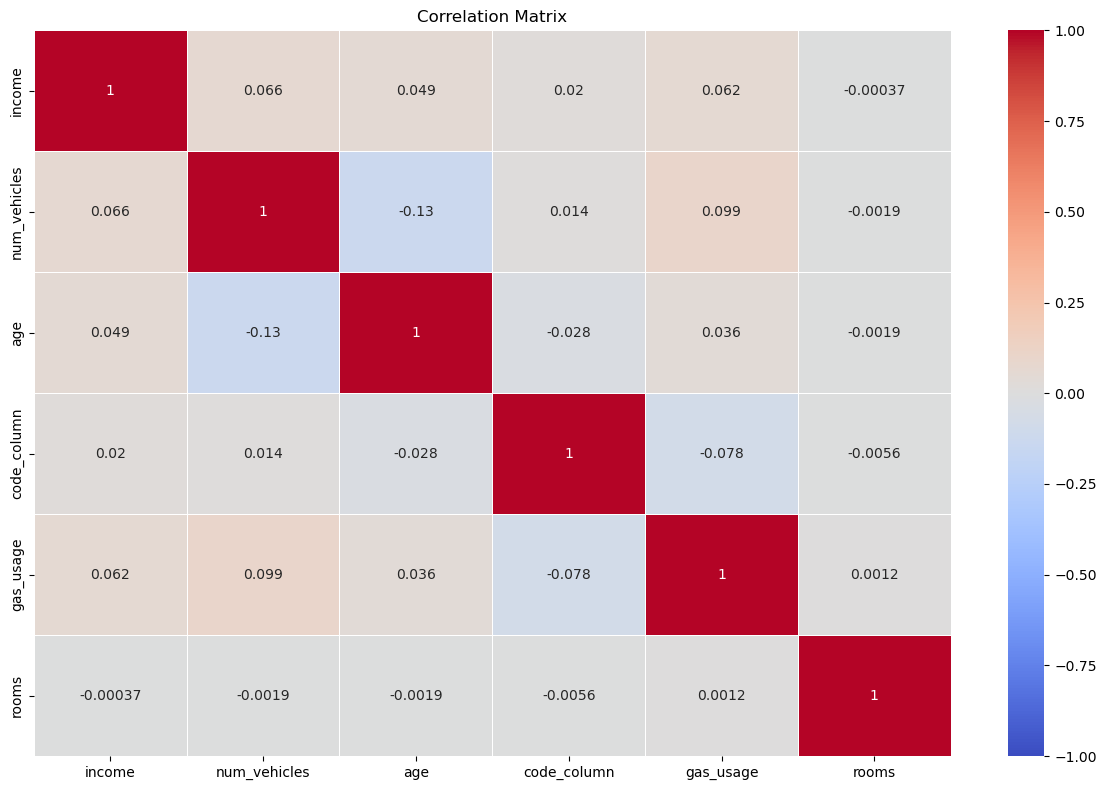

In [29]:
# Correlation Matrix
numeric_data = data.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'])
corr = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


The more significant correlation, is a negative one between age and the number of vehicles.

### 2.3 Data Quality Report

- Completeness: The dataset was evaluated for missing values, and it was found that there are six variables with missing values. The vairable with more missing values (#25515) is the "is_employed", but in this one, the missing value has a meaning, is representing the people customers that are not in the workforce. The variable age has 77 missing values (0.01%), num_vehicles, housing_type and gas_usage have 1686 missing values (0.2%) and recent_move_b has 1687 missing values (0.2%). These missing values will be handled in the data preparation section.

- Key Findings: Despite minor issues, the dataset is sufficiently clean and valid for further analysis and modeling. However, the imbalanced target variable (health insurance) may require special attention during model training.

## 3. Data Preparation

### 3.1 Inclusion/Exclusion of variables
We strat by droping some insignificant variables, the ons that do not provide information or variability to be relevant, and we continue to analyze which variables will not be significant for the modelling analysis. 

In [30]:
# Drop code_column variable
data.drop("code_column", axis=1, inplace=True)
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("custid", axis=1, inplace=True)


After that, we follow by analyzing the state_of_res variable.

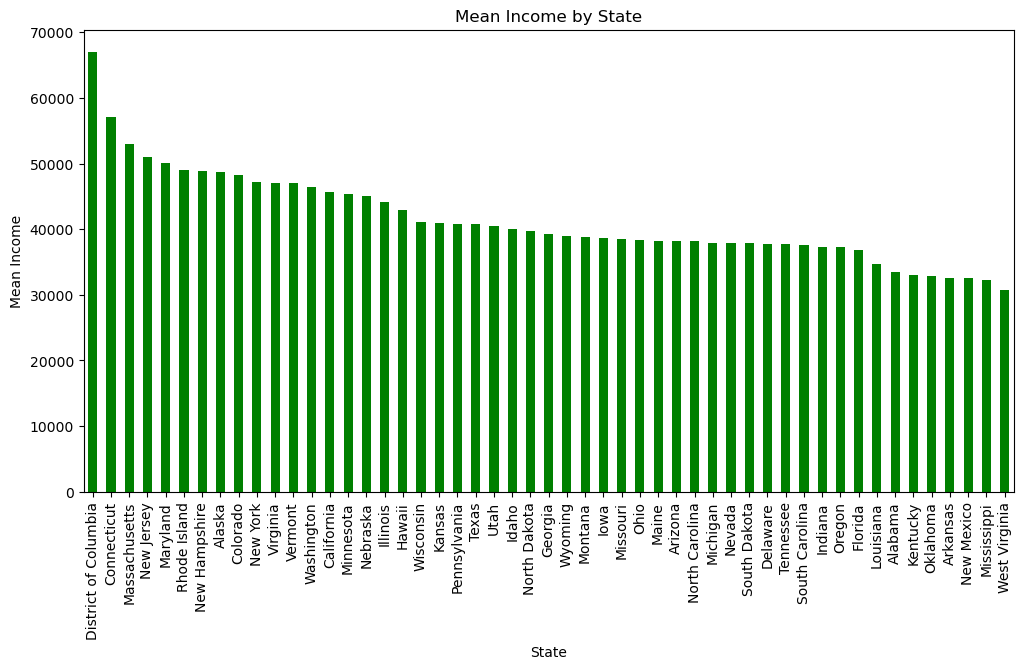

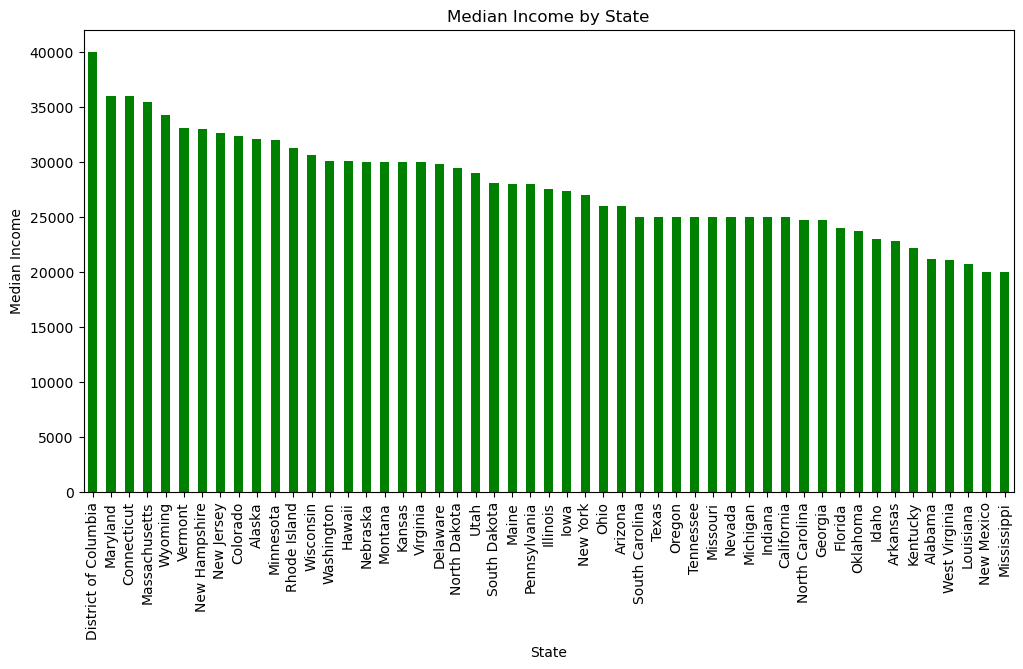

In [31]:
# Mean Income by State
income_state = data.groupby('state_of_res')['income'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
income_state.plot(kind='bar', color='green')
plt.title('Mean Income by State')
plt.xlabel('State')
plt.ylabel('Mean Income')
plt.xticks(rotation=90)
plt.show()

# Median Income by State
income_state_median = data.groupby('state_of_res')['income'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
income_state_median.plot(kind='bar', color='green')
plt.title('Median Income by State')
plt.xlabel('State')
plt.ylabel('Median Income')
plt.xticks(rotation=90)
plt.show()


There is a very uneven distribution between states. Furthermore, 51 states are too many to be a key variable in this analysis. Therefore, we drop this variable.

In [32]:
# Drop state_of_res variable
data.drop("state_of_res", axis=1, inplace=True)

We now present the remaining columns.

In [33]:
# Remaining columns
data.columns

Index(['sex', 'is_employed', 'income', 'marital_status', 'health_ins',
       'housing_type', 'num_vehicles', 'age', 'gas_usage', 'rooms',
       'recent_move_b', 'age_group'],
      dtype='object')

### 3.2 Data cleaning report

As we stated before, the is_employed has a significant number of missing values, because they mean that the customer is not in the workforce. So, we make that transformation.

In [34]:
# Transform Na as Not_in_Workforce
data['is_employed'] = data['is_employed'].fillna('Not_in_Workforce') 

After this we show the number of observations by employment status and boxplots for each taking into account the income (with maximum income limit to be more visually interesting).

In [35]:
# Count the observations by employment status
data.is_employed.value_counts()

is_employed
True                44630
Not_in_Workforce    25515
False                2313
Name: count, dtype: int64

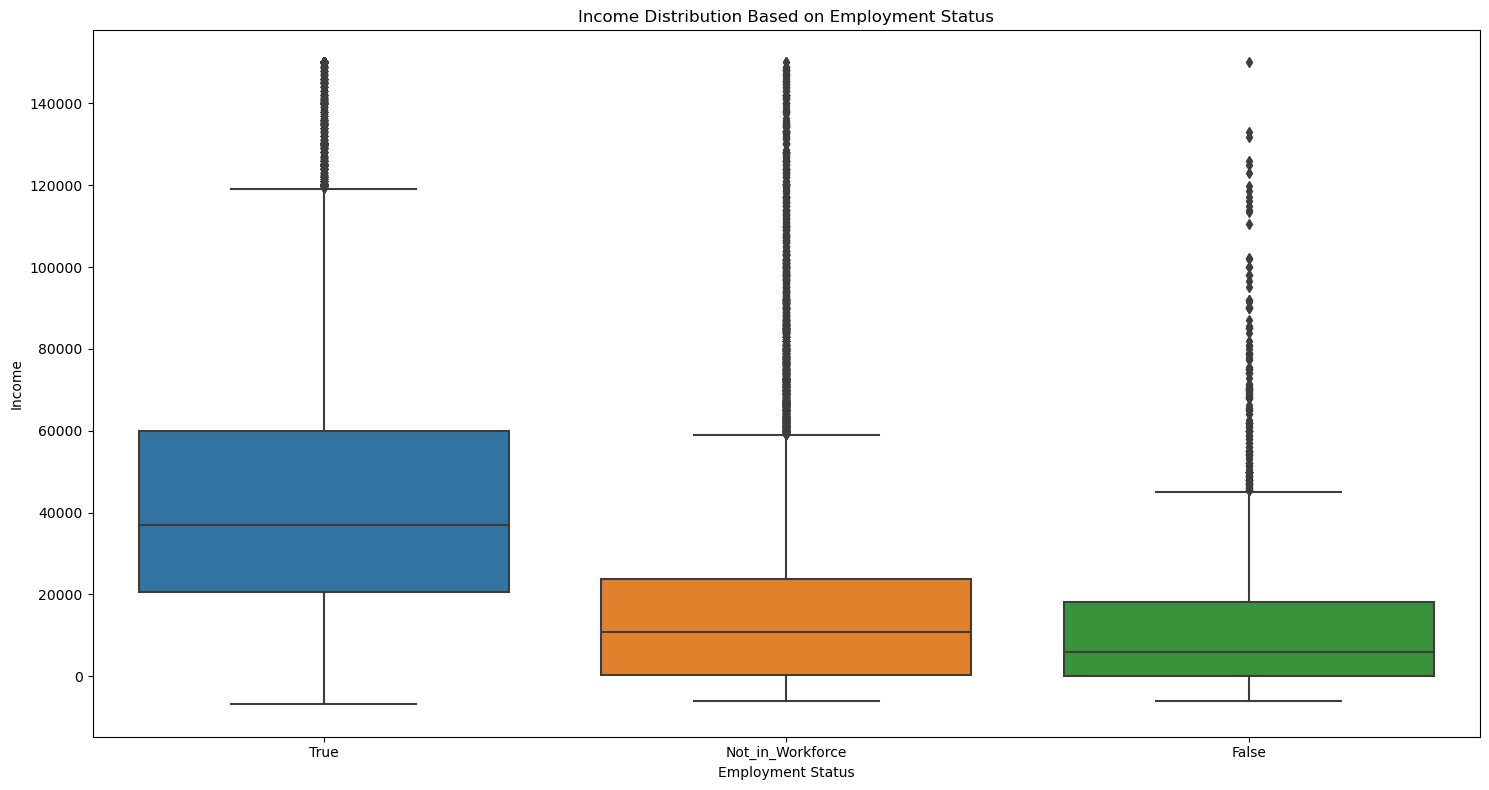

In [36]:
# Boxplots to the income distribution by employment status
# PUT BY ORDER - TRUE, FALSE; NOT WORKFORCE !!!!!!!!!!
plt.figure(figsize=(15,8))

filtered_data = data[data['income'] <= 150000]

sns.boxplot(x='is_employed', y='income', data=filtered_data)
plt.xlabel('Employment Status')
plt.ylabel('Income')
plt.title('Income Distribution Based on Employment Status')
plt.tight_layout()
plt.show()

Now we filter the data for zero income customers and make a count plot. The results are consistent, given that the customers without income are the ones not in the workforce or without a job.

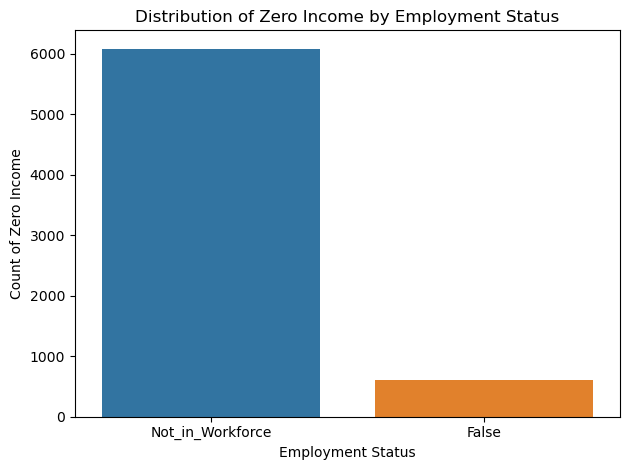

In [37]:
# Distribution of zero income by employment status
#!!!-ORDER
zero_income_data = data[data['income'] == 0]

sns.countplot(x='is_employed', data=zero_income_data)

plt.xlabel('Employment Status')
plt.ylabel('Count of Zero Income')
plt.title('Distribution of Zero Income by Employment Status')

plt.tight_layout()
plt.show()

Now, we analyze the negative income observations (categorized as valid losses).

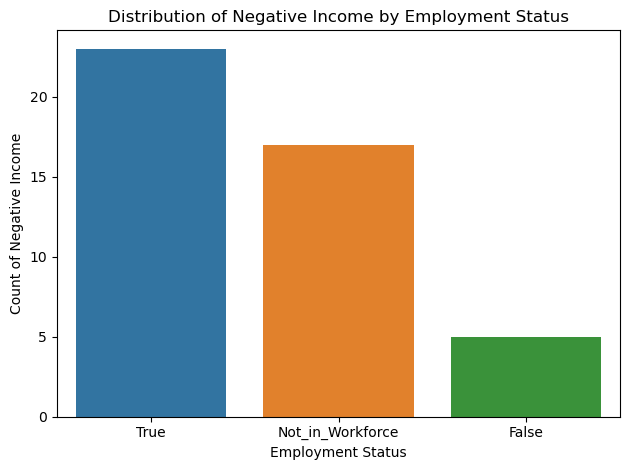

In [38]:
# Distribution of negative income by employment status 
# ORDER!!!!!!!!!!!!!!!!!!!!!!
negative_income_data = data[data['income'] < 0]

sns.countplot(x='is_employed', data=negative_income_data)

plt.xlabel('Employment Status')
plt.ylabel('Count of Negative Income')
plt.title('Distribution of Negative Income by Employment Status')

plt.tight_layout()
plt.show()

This results also make sense, given that the customers wit negative income are primarly the ones not in the workforce or without a job.

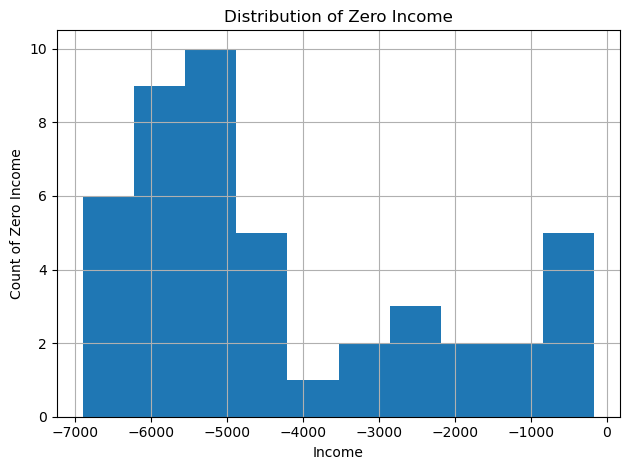

In [39]:
# Histogram for negative income values
negative_income_data.income.hist()

plt.xlabel('Income')
plt.ylabel('Count of Zero Income')
plt.title('Distribution of Zero Income')

plt.tight_layout()
plt.show()

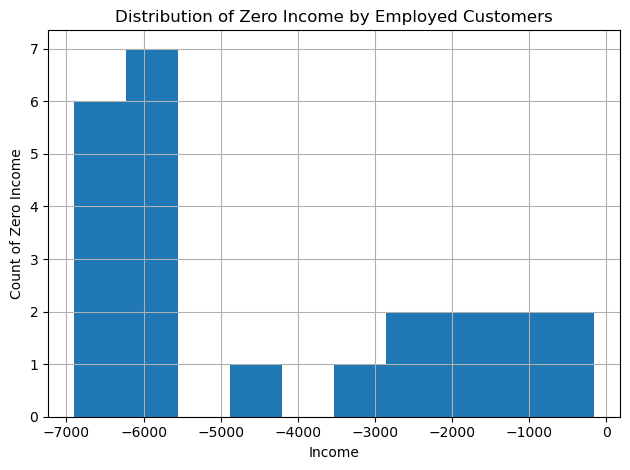

In [40]:
# Histogram for negative income values for employed customers
negative_empl_income_data = data[(data['income'] < 0) & (data['is_employed'] == True)]
negative_empl_income_data['income'].hist()

plt.xlabel('Income')
plt.ylabel('Count of Zero Income')
plt.title('Distribution of Zero Income by Employed Customers')

plt.tight_layout()
plt.show()

Regarding the wide range of values ​​and the existence of negatives, we have to clean this variable. For this we apply the logarithmic scale, and because of the zeros we do psedo counting, i.e. add a very small value to all of them. For the negatives we treat them differently, put them in absolute value, add the pseudo counting, log scale and transform them back to negative.

In [41]:
# Data cleaning for the income variable
pseudo_count = 1e-5

def transform_income(value):
    if value < 0:
        transformed = -np.log(abs(value) + pseudo_count)
        return transformed
    else:
        return np.log(value + pseudo_count)

data['transformed_income'] = data['income'].apply(transform_income)

Now, we plot the distribution of the original income and of the transformed income.

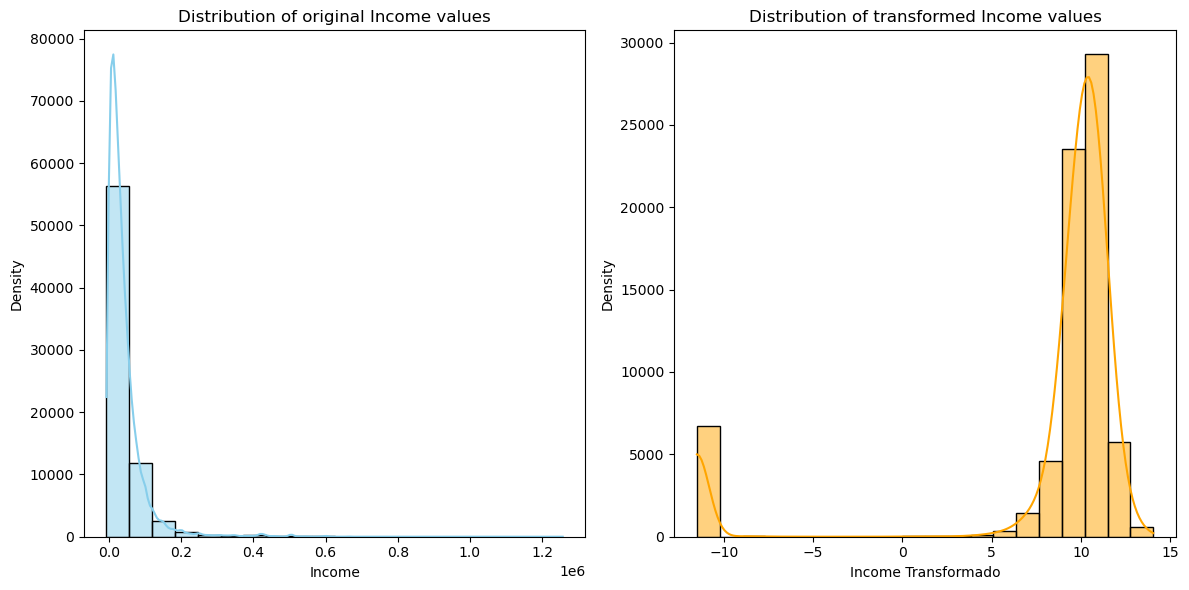

In [42]:
# Distribution of original and transformed income
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['income'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of original Income values')
plt.xlabel('Income')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(data['transformed_income'], kde=True, bins=20, color='orange')
plt.title('Distribution of transformed Income values')
plt.xlabel('Income Transformado')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

As it worked as expected, we replaced the income variable with the transformed.

In [43]:
# Replace income by the transformed value
data['income'] = data['transformed_income']
data.drop("transformed_income", axis=1, inplace=True)

Now, we made some assumptions, taking into account income, employment and housing type variables, described in the code cells

In [44]:
# 1) put 0 for income as a person is unemployed but income was not specified

data.loc[(data['is_employed'] == False) & (data['income'].isnull()), 'income'] = 0

In [45]:
# 2) if employment is not specified and income is 0 then it's reasonable set employment to False 

data.loc[(data['is_employed'].isnull()) & (data['income'] == 0), 'is_employed'] = False


After that, we analyse the missing values related to housing type, number of cars, gas and recent moved.

In [46]:
# Entries that do not have info regarding housing type, number of cars, gas and recent move

missing_info = data[data[['housing_type', 'num_vehicles', 'gas_usage', 'recent_move_b']].isnull().all(axis=1)]

print(f"Total observations without information on the variables under analysis: {len(missing_info)}")
print(f"Percentage in relation to total observations: {len(missing_info) / len(data) * 100:.2f}%")

Total observations without information on the variables under analysis: 1686
Percentage in relation to total observations: 2.33%


And we make a plot to see if the distribution of this observations is similar to the one of the total observations, regarding income and employment.

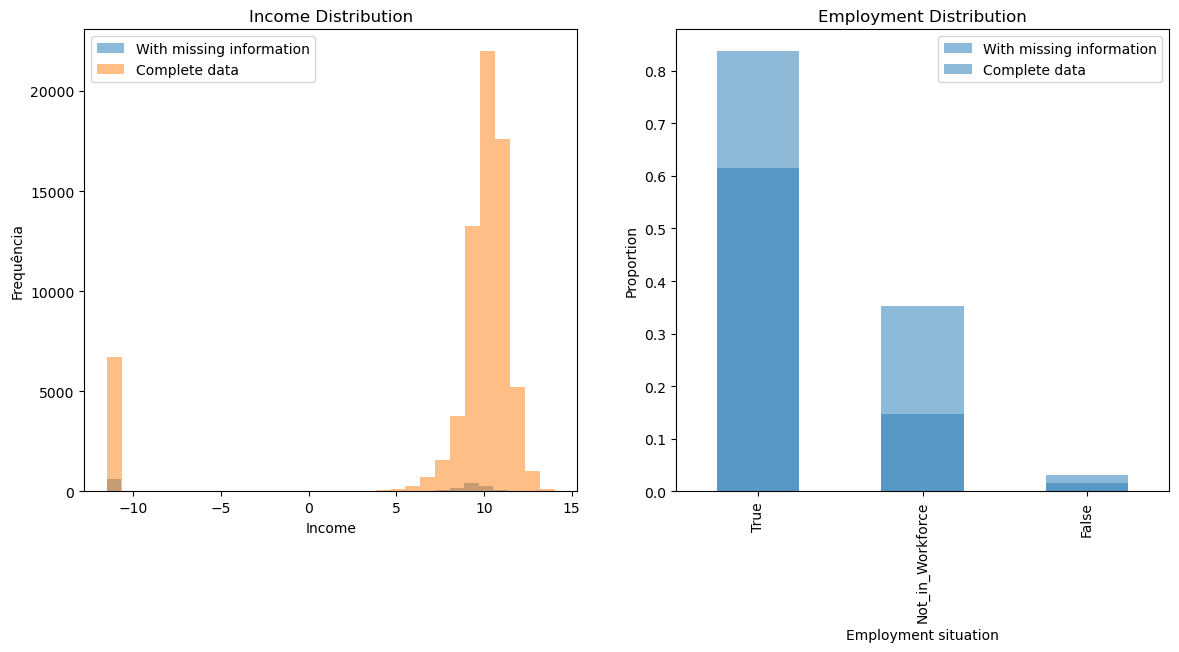

In [47]:
# Plot to the distribution of the observations
# !!!!!!!!!!!!!! ORDER RIGHT PLOT

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(missing_info['income'], bins=30, alpha=0.5, label='With missing information')
plt.hist(data['income'], bins=30, alpha=0.5, label='Complete data')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.legend()


plt.subplot(1, 2, 2)
missing_info['is_employed'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label='With missing information')
data['is_employed'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label='Complete data')
plt.title('Employment Distribution')
plt.xlabel('Employment situation')
plt.ylabel('Proportion')
plt.legend()

As we did not visualize significant differences, we drop this observations.

In [48]:
# Drop the observaiotns with Na values in all of the specified variables
data = data.dropna(subset=['housing_type', 'num_vehicles', 'gas_usage', 'recent_move_b'])

print(f"Number of entries after removal: {len(data)}")


Number of entries after removal: 70771


In [49]:
print("Missing Values for variable:")
data.isnull().sum()

Missing Values for variable:


sex                0
is_employed        0
income             0
marital_status     0
health_ins         0
housing_type       0
num_vehicles       0
age               76
gas_usage          0
rooms              0
recent_move_b      0
age_group          0
dtype: int64

And now we only have missing values in the age variable (and also some relevant outliers). So, we start by placing a threshold at 100 years and everyone above that age has 100 years as their assigned age and then we solve the problem of the (few) missing values, assigning the median age to each of them.

    age
0  24.0
1  82.0
2  31.0
3  93.0
4  67.0


C:\Users\diogo\AppData\Local\Temp\ipykernel_22288\3731535144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].clip(upper=100)


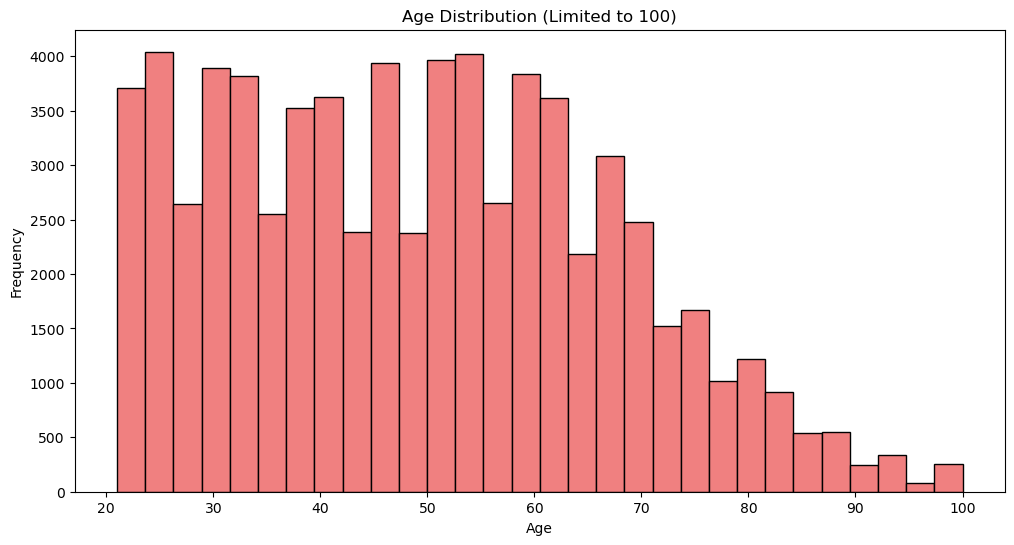

In [50]:
# Applying a threshold to the age variable

data['age'] = data['age'].clip(upper=100)

print(data[['age']].head())

plt.figure(figsize=(12, 6))
plt.hist(data['age'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Age Distribution (Limited to 100)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Solving the missing values in the age variable

median_age = data['age'].median() 
data['age'] = data['age'].fillna(median_age)

print(data.isnull().sum())

sex               0
is_employed       0
income            0
marital_status    0
health_ins        0
housing_type      0
num_vehicles      0
age               0
gas_usage         0
rooms             0
recent_move_b     0
age_group         0
dtype: int64


C:\Users\diogo\AppData\Local\Temp\ipykernel_22288\918596500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].fillna(median_age)


We continue by treating the gas_usage variable, which has some particularities. As values ​​of 003 mean that it is not charged or gas not used, we replace it by 0. As 001 and 002 mean that the gas usage is included in the rent or in condo fee or in electricity payment, we replace that values ​​by the mean


In [52]:
# Gas_usage variable transformation

data = data.dropna(subset=['gas_usage'])
data['gas_usage'] = data['gas_usage'].replace(1, data.gas_usage.mean())
data['gas_usage'] = data['gas_usage'].replace(2, data.gas_usage.mean())
data['gas_usage'] = data['gas_usage'].replace(3, 0)

### 3.3 Construct Data
We continue preparing the data by creating a variable that considers a small, medium or large house taking into account the number of bedrooms.

In [53]:
# Creating a new variable - house size (big, medium, small) 

bins = [0, 2, 4, float('inf')]  # 1 and 2 bedrooms -> Small, 3 and 4 bedrooms -> Medium, 5 or more bedrooms -> Big
labels = ['Small', 'Medium', 'Big']

data['size_house'] = pd.cut(data['rooms'], bins=bins, labels=labels, right=True)

print(data[['rooms', 'size_house']].head())

   rooms size_house
0      3     Medium
1      6        Big
2      3     Medium
3      2      Small
4      2      Small


After the creation we make a visualization to see the distribution by house size.

size_house
Small     23712
Big       23544
Medium    23515
Name: count, dtype: int64


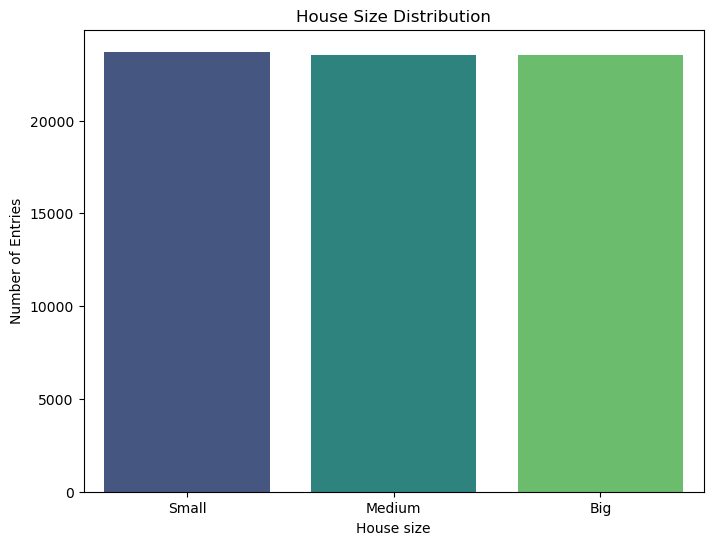

In [54]:
# House size distribution
print(data['size_house'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x="size_house", data=data, palette='viridis', order=['Small', 'Medium', 'Big'])
plt.title('House Size Distribution')
plt.xlabel('House size')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

### 3.4 Reformatted Data
Finally, we standadize the age and the gas_usage variables, transform the target variable as a boolean one and make an one-hot encoding to the categorical variables (this last, saved in a different dataset).

In [55]:
# Standadize the age and gas_usage variables
from sklearn.preprocessing import StandardScaler

corr_matrix_original = data.select_dtypes(include=[float, int]).corr()

scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])
data['gas_usage'] = scaler.fit_transform(data[['gas_usage']])

In [56]:
# Transform health_ins to a boolean variable
data = data.dropna(subset=['health_ins'])
data = data.copy() 
data['health_ins'] = data['health_ins'].astype(int)

In [57]:
# One-hot encoding to the categorical variables
categorical_columns = ['sex', 'housing_type', 'is_employed', 'recent_move_b']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("Encoded dataset:")
print(data_encoded.head())

Encoded dataset:
      income      marital_status  health_ins  num_vehicles       age  \
0   9.998798       Never married           1           0.0 -1.422657   
1  10.051908  Divorced/Separated           1           0.0  1.848215   
2   9.952278       Never married           1           2.0 -1.027896   
3  10.539270             Widowed           1           1.0  2.468552   
4  10.571317  Divorced/Separated           1           2.0  1.002300   

   gas_usage  rooms    age_group size_house  sex_Male  \
0   2.651819      3        Young     Medium      True   
1  -0.728898      6       Senior        Big     False   
2  -0.084952      3  Middle-aged     Medium     False   
3   1.202940      2       Senior      Small     False   
4  -0.728898      2       Senior      Small      True   

   housing_type_Homeowner with mortgage/loan  \
0                                      False   
1                                      False   
2                                       True   
3              

### 3.5 Final Dataset Description
And now we present and describe the final dataset.

In [58]:
print(data)

          sex       is_employed     income      marital_status  health_ins  \
0        Male              True   9.998798       Never married           1   
1      Female  Not_in_Workforce  10.051908  Divorced/Separated           1   
2      Female              True   9.952278       Never married           1   
3      Female  Not_in_Workforce  10.539270             Widowed           1   
4        Male              True  10.571317  Divorced/Separated           1   
...       ...               ...        ...                 ...         ...   
72452  Female              True  11.350407             Married           1   
72453  Female              True   9.825526       Never married           0   
72454  Female  Not_in_Workforce   9.942708             Widowed           1   
72455    Male              True  11.225243             Married           1   
72456  Female              True  10.007848  Divorced/Separated           0   

                       housing_type  num_vehicles       age  ga

In [59]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 70771
Number of columns: 13


In [60]:
data.columns

Index(['sex', 'is_employed', 'income', 'marital_status', 'health_ins',
       'housing_type', 'num_vehicles', 'age', 'gas_usage', 'rooms',
       'recent_move_b', 'age_group', 'size_house'],
      dtype='object')

In [61]:
data.describe()

,income,health_ins,num_vehicles,age,gas_usage,rooms
count,70771.000000,70771.000000,70771.000000,7.077100e+04,7.077100e+04,70771.000000
mean,8.339640,0.909101,2.066849,-7.635440e-17,-1.481908e-16,3.495146
std,6.206039,0.287467,1.170058,1.000007e+00,1.000007e+00,1.706561
min,-11.512925,0.000000,0.000000,-1.591840e+00,-7.288983e-01,1.000000
25%,9.332558,1.000000,1.000000,-8.587133e-01,-7.288983e-01,2.000000
50%,10.221578,1.000000,2.000000,-6.919264e-02,-2.459386e-01,3.000000
75%,10.860152,1.000000,3.000000,7.203280e-01,2.370210e-01,5.000000
max,14.044238,1.000000,6.000000,2.863313e+00,8.447335e+00,6.000000


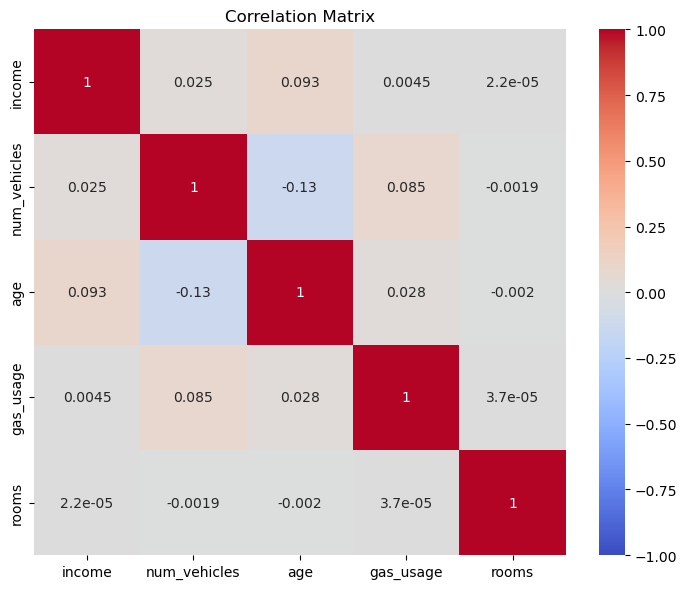

In [62]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_original, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

- PCA ANALYSIS

In [63]:
X = data.drop(columns=['health_ins'])  

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


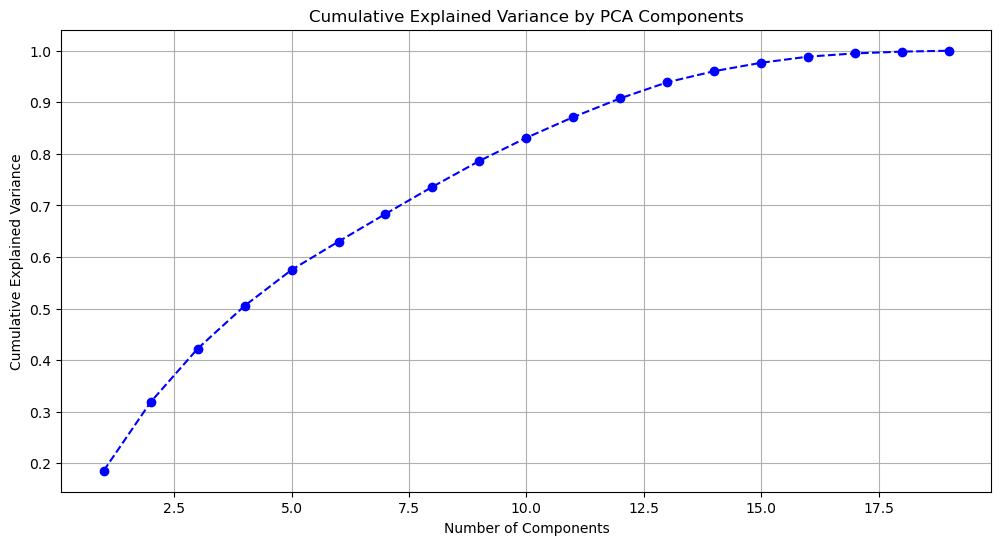

Variância explicada por componente:
Componente 1: 18.55%
Componente 2: 13.31%
Componente 3: 10.35%
Componente 4: 8.31%
Componente 5: 6.97%
Componente 6: 5.50%
Componente 7: 5.36%
Componente 8: 5.26%
Componente 9: 5.02%
Componente 10: 4.48%
Componente 11: 4.02%
Componente 12: 3.64%
Componente 13: 3.11%
Componente 14: 2.15%
Componente 15: 1.63%
Componente 16: 1.19%
Componente 17: 0.63%
Componente 18: 0.35%
Componente 19: 0.17%


In [64]:
pca = PCA(n_components=None) 
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print("Variância explicada por componente:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {var:.2%}")


In [65]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Número de componentes escolhidos: {pca_95.n_components_}")


Número de componentes escolhidos: 14


In [66]:
component_loadings = pd.DataFrame(pca.components_, columns=X_encoded.columns)

top_features_pc1 = component_loadings.iloc[0].sort_values(ascending=False).head(10)
print("Variáveis mais importantes para o primeiro componente:")
print(top_features_pc1)


Variáveis mais importantes para o primeiro componente:
age                                          0.464684
age_group_Senior                             0.414298
is_employed_Not_in_Workforce                 0.392644
marital_status_Widowed                       0.222082
marital_status_Married                       0.130603
gas_usage                                    0.023701
housing_type_Occupied with no rent           0.013138
size_house_Medium                            0.005494
housing_type_Homeowner with mortgage/loan    0.003201
rooms                                       -0.004295
Name: 0, dtype: float64


# Models

#### 1. Random Forest